# svm tutorial
hands on of https://qiita.com/c60evaporator/items/8864f7c1384a3c6e9bd9#%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%82%BF%E3%83%BC%E3%83%9E%E3%82%B7%E3%83%B3%E3%81%AE%E6%80%A7%E8%83%BD%E5%90%91%E4%B8%8A

# 入力データの確認

/Users/s15255/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/s15255/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/s15255/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/s15255/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

Text(0, 0.5, 'weight [kg]')

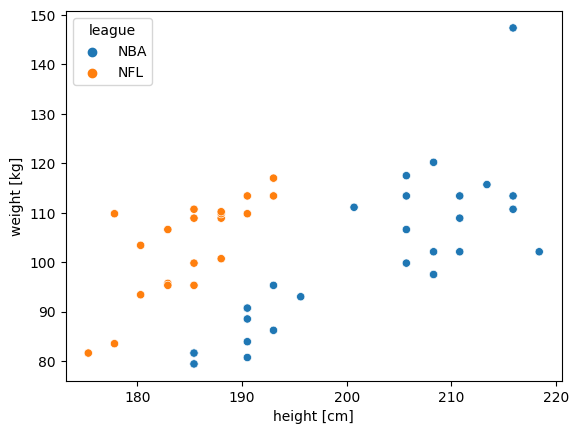

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_athelete = pd.read_csv(f'./nba_1.csv')
sns.scatterplot(x='height', y='weight', data=df_athelete, hue='league')
plt.xlabel('height [cm]')
plt.ylabel('weight [kg]')


### scikit-learnで分類

/Users/s15255/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


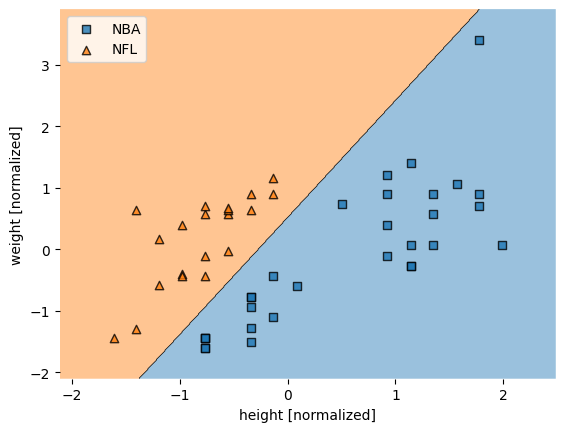

In [11]:
import numpy as np
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

def label_str_to_int(y):  # 目的変数をstr型→int型に変換(plot_decision_regions用)
    label_names = list(dict.fromkeys(y[:, 0]))
    label_dict = dict(zip(label_names, range(len(label_names))))
    y_int=np.vectorize(lambda x: label_dict[x])(y)
    return y_int
def legend_int_to_str(ax, y):  # 凡例をint型→str型に変更(plot_decision_regions用)
    hans, labs = ax.get_legend_handles_labels()
    ax.legend(handles=hans, labels=list(dict.fromkeys(y[:, 0])))

X = df_athelete[['height','weight']].values  # 説明変数(身長、体重)
y = df_athelete[['league']].values  # 目的変数(種目)
stdsc = StandardScaler()  # 標準化用インスタンス
X = stdsc.fit_transform(X)  # 説明変数を標準化
y_int = label_str_to_int(y)  # 目的変数をint型に変換
model = SVC(kernel='linear', C=1000)  # 線形SVMを定義(後述のソフトマージンの影響を減らすためCは大きく)
model.fit(X, y_int)  # SVM学習を実行

ax = plot_decision_regions(X, y_int[:, 0], clf=model, zoom_factor=2) #決定境界を可視化
plt.xlabel('height [normalized]')  # x軸のラベル
plt.ylabel('weight [normalized]')  # y軸のラベル
legend_int_to_str(ax, y)  # 凡例をint型→str型に変更